In [1]:
import numpy as np
import scipy as sc
import os, re
import matplotlib.pyplot as plt
from prettyprint import pp
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, classification_report
from datetime import datetime as dt
from ipy_table import *
from string import punctuation, digits

In [2]:
def train_test_split(ratio, classes, files):
    """
    this method will split the input list of files to train and test sets.
    *Note: currently this method uses the simplest way an array can be split in two parts.
    Parameters
    ----------
    ratio: float
           ratio of total documents in each class assigned to the training set
    classes: list
             list of label classes
    files: dictionary
           a dictionary with list of files for each class
    
    Returns
    -------
    train_dic: dictionary
                a dictionary with lists of documents in the training set for each class
    test_dict: dictionary
                a dictionary with lists of documents in the testing set for each class
    """
    train_dict = {}
    test_dict = {}
    for cl in classes:
        train_cnt = int(ratio * len(files[cl]))
        train_dict[cl] = files[cl][:train_cnt]
        test_dict[cl] = files[cl][train_cnt:]
    return train_dict, test_dict

In [3]:
def cleanupText(path):
    """
    this method will read in a text file and try to cleanup its text.
    Parameters
    ----------
    path: path to the document file
    
    Returns
    -------
    text_cleaned: cleaned up raw text in the input file
    """
    
    text_cleaned = ''
    try:
        f = open(path)
        raw = f.read().lower()
        text =  raw
        text_cleaned = text.translate(None, punctuation + digits)
        # print "\n Word count before:" + str(len(text_translated.split())) + "\n"
        # for stop in stop_word:
        #   text_translated = text_translated.replace(stop,'')
        # print "\n Word count after:" + str(len(text_translated.split())) + "\n"
        text_cleaned = ' '.join([word for word in text_cleaned.split(' ') if (word and len(word) > 1)])
        
    finally:
        f.close()
    return text_cleaned


In [4]:
def testClassifier(x_train, y_train, x_test, y_test, clf):
    """
    this method will first train the classifier on the training data
    and will then test the trained classifier on test data.
    Finally it will report some metrics on the classifier performance.
    
    Parameters
    ----------
    x_train: np.ndarray
             train data matrix
    y_train: list
             train data label
    x_test: np.ndarray
            test data matrix
    y_test: list
            test data label
    clf: sklearn classifier object implementing fit() and predict() methods
    
    Returns
    -------
    metrics: list
             [training time, testing time, recall and precision for every class, macro-averaged F1 score]
    """
    #metrics = []
    start = dt.now()
    clf.fit(x_train, y_train)
    end = dt.now()
    print 'training time: ', (end - start)
    
    # add training time to metrics
    #metrics.append(end-start)
    
    start = dt.now()
    yhat = clf.predict(x_test)
    end = dt.now()
    print 'testing time: ', (end - start)
    
    # add testing time to metrics
    #metrics.append(end-start)
    
    print 'classification report: '
#     print classification_report(y_test, yhat)
    pp(classification_report(y_test, yhat))
    
    print 'f1 score'
    print f1_score(y_test, yhat, average='macro')
    
    print 'accuracy score'
    accuracy = accuracy_score(y_test, yhat)
    print accuracy
    #metrics.append(accuracy)
    #precision = precision_score(y_test, yhat, average=None)
    #recall = recall_score(y_test, yhat, average=None)
    
    # add precision and recall values to metrics
    #for p, r in zip(precision, recall):
    #    metrics.append(p)
    #    metrics.append(r)
    
    
    #add macro-averaged F1 score to metrics
    #metrics.append(f1_score(y_test, yhat, average='macro'))
    
    print 'confusion matrix:'
    print confusion_matrix(y_test, yhat)
    
    # plot the confusion matrix
    plt.imshow(confusion_matrix(y_test, yhat), interpolation='nearest')
    plt.show()
    
    return accuracy

4744
42743
(4744, 47265)
0.1
training time:  0:00:01.052021
testing time:  0:00:20.600311
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.81      0.65      0.72      3550
   giai-tri       0.86      0.97      0.91      4117
   giao-duc       0.93      0.81      0.87      3796
   khoa-hoc       0.85      0.85      0.85      3959
 kinh-doanh       0.69      0.94      0.80      4050
 oto-xe-may       0.99      0.80      0.88      3783
  phap-luat       0.85      0.92      0.88      4050
     so-hoa       0.95      0.81      0.87      3622
   the-gioi       0.77      0.92      0.84      4032
   the-thao       0.98      0.98      0.98      4118
    thoi-su       0.80      0.67      0.73      3666

avg / total       0.86      0.85      0.85     42743
"
f1 score
0.849093909079
accuracy score
0.852162927263
confusion matrix:
[[2315  150   24  262  242    1   60    3  398    3   92]
 [  16 3980   21    6   33    0   11    3   39    2    6]
 [  

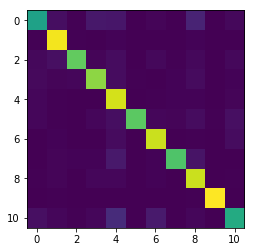

9492
37995
(9492, 66648)
0.2
training time:  0:00:03.317372
testing time:  0:00:27.250156
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.73      0.79      3156
   giai-tri       0.90      0.97      0.93      3660
   giao-duc       0.93      0.84      0.88      3374
   khoa-hoc       0.89      0.87      0.88      3519
 kinh-doanh       0.74      0.93      0.82      3600
 oto-xe-may       0.98      0.91      0.95      3363
  phap-luat       0.88      0.91      0.90      3600
     so-hoa       0.95      0.86      0.90      3220
   the-gioi       0.81      0.93      0.87      3584
   the-thao       0.99      0.98      0.99      3660
    thoi-su       0.84      0.72      0.77      3259

avg / total       0.89      0.88      0.88     37995
"
f1 score
0.879203840433
accuracy score
0.88114225556
confusion matrix:
[[2311  111   15  165  156    3   34    5  278    2   76]
 [  18 3551   13    5   24    1    4    4   32    1    7]
 [  4

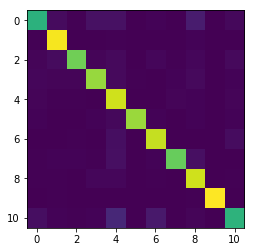

14242
33245
(14242, 83289)
0.3
training time:  0:00:12.857687
testing time:  0:00:31.895938
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.77      0.81      2761
   giai-tri       0.93      0.97      0.95      3202
   giao-duc       0.93      0.86      0.89      2952
   khoa-hoc       0.89      0.87      0.88      3079
 kinh-doanh       0.78      0.91      0.84      3150
 oto-xe-may       0.99      0.91      0.95      2943
  phap-luat       0.87      0.92      0.89      3150
     so-hoa       0.94      0.88      0.91      2817
   the-gioi       0.84      0.93      0.88      3136
   the-thao       0.99      0.99      0.99      3203
    thoi-su       0.83      0.77      0.80      2852

avg / total       0.89      0.89      0.89     33245
"
f1 score
0.889684039922
accuracy score
0.891201684464
confusion matrix:
[[2125   69   14  130  123    2   33    4  188    0   73]
 [  20 3109   14    6   15    0    3    4   23    1    7]
 [

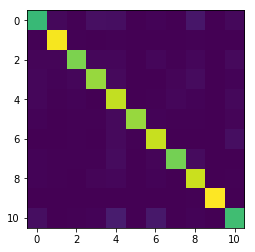

18991
28496
(18991, 95423)
0.4
training time:  0:00:26.987404
testing time:  0:00:31.166871
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.82      0.83      2367
   giai-tri       0.93      0.97      0.95      2745
   giao-duc       0.92      0.85      0.89      2531
   khoa-hoc       0.90      0.88      0.89      2639
 kinh-doanh       0.81      0.90      0.85      2700
 oto-xe-may       0.99      0.91      0.95      2522
  phap-luat       0.87      0.92      0.90      2700
     so-hoa       0.94      0.89      0.91      2415
   the-gioi       0.87      0.92      0.90      2688
   the-thao       0.99      0.99      0.99      2745
    thoi-su       0.82      0.79      0.81      2444

avg / total       0.90      0.90      0.90     28496
"
f1 score
0.895818932532
accuracy score
0.897108366086
confusion matrix:
[[1939   47   12   96  100    1   13    6   84    1   68]
 [  15 2676    8    5    8    0    6    5   18    0    4]
 [

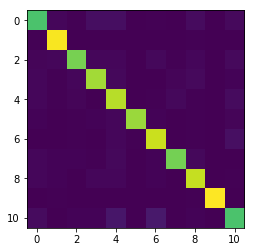

23741
23746
(23741, 107847)
0.5
training time:  0:00:43.681752
testing time:  0:00:29.562988
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.83      0.84      1972
   giai-tri       0.93      0.97      0.95      2287
   giao-duc       0.90      0.86      0.88      2109
   khoa-hoc       0.88      0.89      0.88      2199
 kinh-doanh       0.80      0.90      0.85      2250
 oto-xe-may       0.99      0.91      0.95      2102
  phap-luat       0.88      0.91      0.89      2250
     so-hoa       0.94      0.86      0.90      2012
   the-gioi       0.88      0.90      0.89      2240
   the-thao       0.99      0.99      0.99      2288
    thoi-su       0.83      0.80      0.81      2037

avg / total       0.90      0.90      0.90     23746
"
f1 score
0.894135407232
accuracy score
0.895224458856
confusion matrix:
[[1645   39   13   94   70    1    9    3   53    0   45]
 [  12 2220   12    4   11    0    8    4   13    0    3]
 

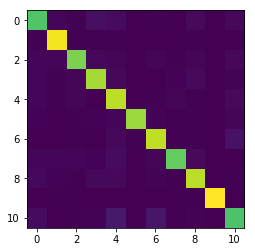

28488
18999
(28488, 120183)
0.6
training time:  0:01:00.079744
testing time:  0:00:26.096701
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.85      0.84      0.85      1578
   giai-tri       0.93      0.97      0.95      1830
   giao-duc       0.91      0.86      0.89      1687
   khoa-hoc       0.89      0.90      0.90      1760
 kinh-doanh       0.78      0.90      0.84      1800
 oto-xe-may       0.99      0.88      0.93      1682
  phap-luat       0.87      0.92      0.89      1800
     so-hoa       0.94      0.84      0.89      1610
   the-gioi       0.89      0.93      0.91      1792
   the-thao       0.99      0.99      0.99      1830
    thoi-su       0.81      0.80      0.81      1630

avg / total       0.90      0.90      0.90     18999
"
f1 score
0.894703474963
accuracy score
0.895889257329
confusion matrix:
[[1329   27   11   76   49    1    8    2   41    0   34]
 [   9 1780   10    4    9    0    5    2   10    0    1]
 

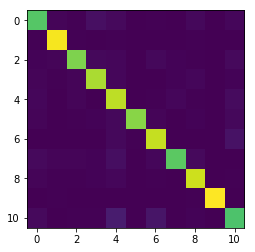

33236
14251
(33236, 133112)
0.7
training time:  0:01:19.892016
testing time:  0:00:19.953326
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.87      0.84      0.85      1184
   giai-tri       0.95      0.97      0.96      1373
   giao-duc       0.91      0.87      0.89      1266
   khoa-hoc       0.88      0.90      0.89      1320
 kinh-doanh       0.79      0.91      0.84      1350
 oto-xe-may       0.98      0.90      0.94      1261
  phap-luat       0.88      0.89      0.89      1350
     so-hoa       0.95      0.83      0.89      1208
   the-gioi       0.90      0.93      0.91      1344
   the-thao       0.99      0.99      0.99      1373
    thoi-su       0.80      0.81      0.80      1222

avg / total       0.90      0.90      0.90     14251
"
f1 score
0.89587470516
accuracy score
0.89691951442
confusion matrix:
[[ 994   17   14   61   30    1    5    2   31    0   29]
 [   6 1331   11    4    9    0    3    2    6    0    1]
 [ 

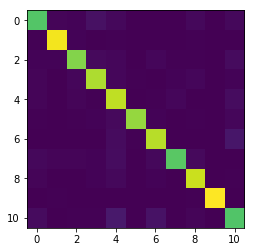

37987
9500
(37987, 144910)
0.8
training time:  0:01:34.682773
testing time:  0:00:13.500101
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.86      0.83      0.84       789
   giai-tri       0.95      0.97      0.96       915
   giao-duc       0.91      0.88      0.90       844
   khoa-hoc       0.87      0.88      0.87       880
 kinh-doanh       0.78      0.92      0.84       900
 oto-xe-may       0.98      0.90      0.94       841
  phap-luat       0.89      0.90      0.90       900
     so-hoa       0.95      0.79      0.86       805
   the-gioi       0.89      0.95      0.92       896
   the-thao       0.99      0.98      0.99       915
    thoi-su       0.79      0.80      0.80       815

avg / total       0.90      0.89      0.89      9500
"
f1 score
0.891916594764
accuracy score
0.893368421053
confusion matrix:
[[657  12   5  42  24   1   4   2  13   0  29]
 [  6 889   4   3   6   0   1   2   3   0   1]
 [ 11   9 745  30  13   

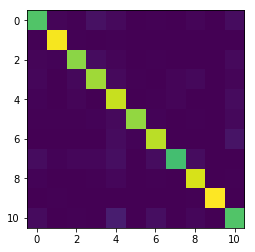

42734
4753
(42734, 154451)
0.9
training time:  0:01:58.200817
testing time:  0:00:06.742786
classification report: 
"             precision    recall  f1-score   support

    du-lich       0.83      0.83      0.83       395
   giai-tri       0.95      0.96      0.95       458
   giao-duc       0.93      0.91      0.92       422
   khoa-hoc       0.88      0.87      0.88       440
 kinh-doanh       0.78      0.95      0.86       450
 oto-xe-may       0.97      0.93      0.95       421
  phap-luat       0.85      0.88      0.86       450
     so-hoa       0.93      0.68      0.78       403
   the-gioi       0.89      0.92      0.90       448
   the-thao       0.99      0.98      0.99       458
    thoi-su       0.79      0.81      0.80       408

avg / total       0.89      0.89      0.89      4753
"
f1 score
0.884027346722
accuracy score
0.88680833158
confusion matrix:
[[326   6   4  20  14   1   3   2   8   0  11]
 [  4 441   2   2   5   0   0   1   2   0   1]
 [  5   6 382   4   4   0

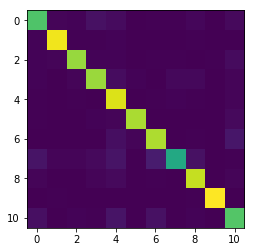

In [7]:
data_path = '/Users/alexandre/Projects/TextClassificationBayes/tok_vnexpress/'
stopwords_path = '/Users/alexandre/Projects/TextClassificationBayes/vietnamese-stopwords-dash.txt'


#Classes are the folder names
class_names = os.listdir(data_path)
folders =  [data_path + folder + '/' for folder in os.listdir(data_path) if folder != ".DS_Store"]

if '.DS_Store' in class_names: del class_names[0]

#list the files of each class

metrics_dict = {}

ratio = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
files = {}
for folder, name in zip(folders, class_names):
    files[name] = [folder + f for f in os.listdir(folder)]


for train_test_ratio in ratio:

   
    train_path, test_path = train_test_split(train_test_ratio, class_names, files)
    #train_path, test_path, class_train, class_test = train_test_split(files, class_names, test_size=0.3, random_state=42)
    
    train_arr = []
    test_arr = []
    train_lbl = []
    test_lbl = []
    
    for cl in class_names:
        for path in train_path[cl]:
            train_arr.append(cleanupText(path))
            train_lbl.append(cl)
        for path in test_path[cl]:
            test_arr.append(cleanupText(path))
            test_lbl.append(cl)
            
    print len(train_arr)
    print len(test_arr)
    vectorizer = CountVectorizer()
    vectorizer.fit(train_arr)
    train_mat = vectorizer.transform(train_arr)
    print train_mat.shape
    #print train_mat
    test_mat = vectorizer.transform(test_arr)
    #print test_mat.shape
    tfidf = TfidfTransformer()
    tfidf.fit(train_mat)
    train_tfmat = tfidf.transform(train_mat)
    #print train_tfmat.shape
    #print train_tfmat
    test_tfmat = tfidf.transform(test_mat)
    #print test_tfmat.shape
    alpha=0.1
    print train_test_ratio
    mnb = MultinomialNB(alpha=alpha)
    #mnb_me = testClassifier(train_mat.toarray(), train_lbl, test_mat.toarray(), test_lbl, mnb)
    mnb_me = testClassifier(train_tfmat.toarray(), train_lbl, test_tfmat.toarray(), test_lbl, mnb)
    metrics_dict.update({train_test_ratio:mnb_me})

(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
(0.85216292726294363, 0.88114225555994208, 0.89120168446382919, 0.89710836608646827, 0.89522445885622837, 0.89588925732933311, 0.8969195144200407, 0.89336842105263159, 0.88680833158005468)


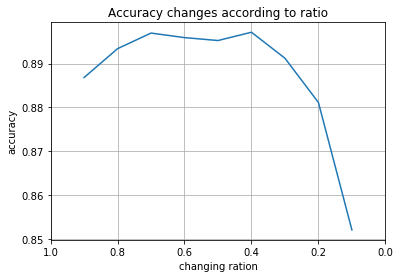

In [8]:
#print graph for result
lists = sorted(metrics_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
print x
print y
plt.plot(x, y)
plt.xlim(1, 0)  # decreasing time
plt.xlabel('changing ration')
plt.ylabel('accuracy')
plt.title('Accuracy changes according to ratio')
plt.grid(True)

plt.show()